# IO

In [1]:
from PineBioML import IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

In [4]:
x.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column552,Column553,Column554,Column555,Column556,Column557,Column558,Column559,Column560,Column561
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [5]:
y.value_counts()

target
STANDING              556
LAYING                545
SITTING               508
WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
STAND_TO_LIE           49
SIT_TO_LIE             32
LIE_TO_STAND           27
LIE_TO_SIT             25
STAND_TO_SIT           23
SIT_TO_STAND           10
Name: count, dtype: int64

# Preprocessing

In [6]:
from PineBioML.preprocessing import Normalizer

x = Normalizer(method="StandardScaler").fit_transform(x)

In [7]:
from PineBioML.preprocessing import impute

# The imputer will drop the features within which more than 60% of values are unkown.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.6, strategy = "constant")
x = simple.fit_transform(x)

# Data overview

In [8]:
import PineBioML.report.utils as report_utils

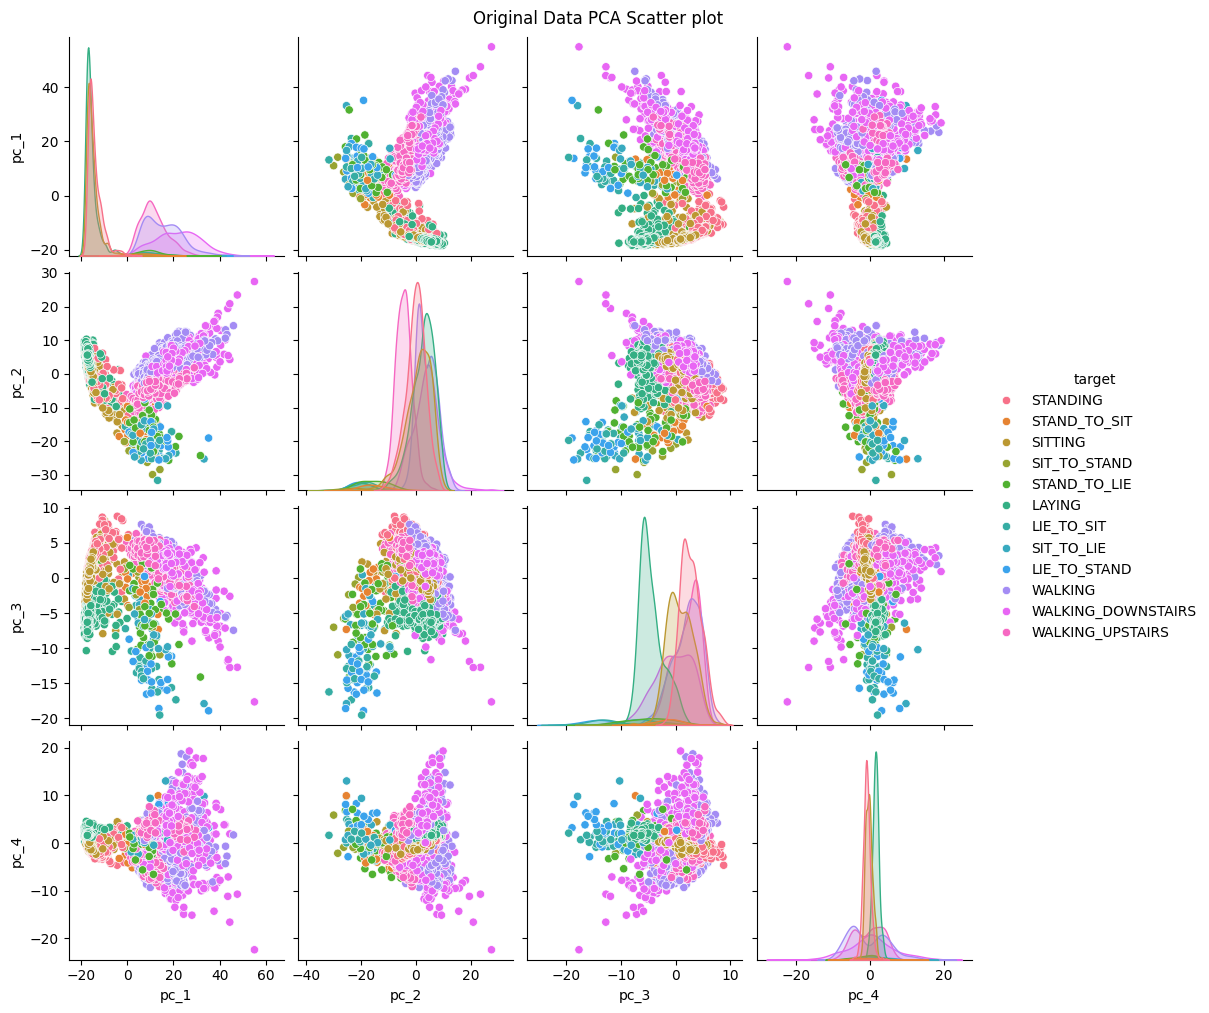

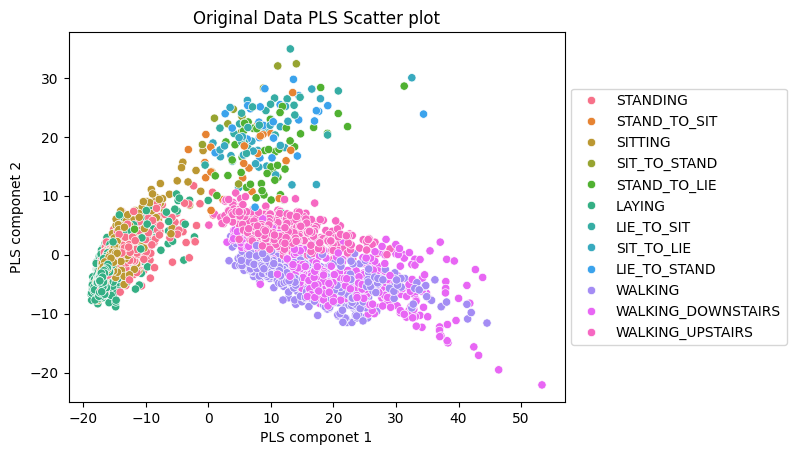

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


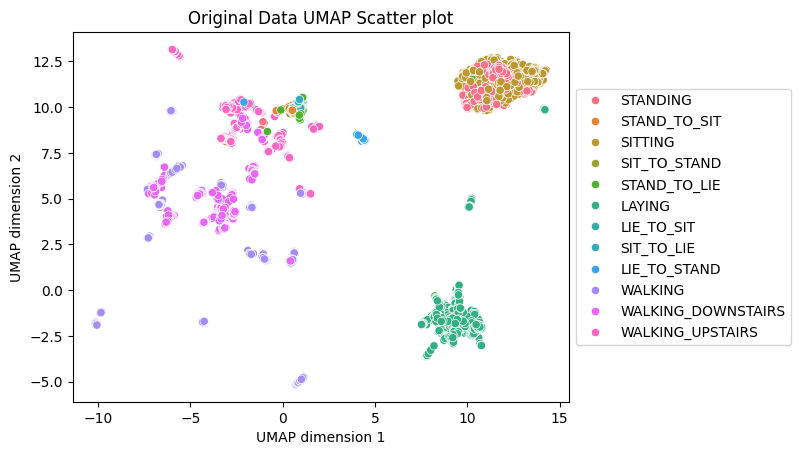

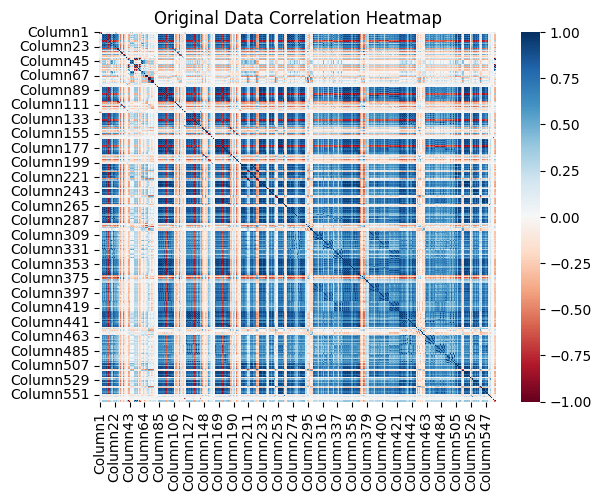

In [9]:
report_utils.data_overview(x, y, is_classification=True, prefix="Original Data", save_fig=True, save_path="./output/images/", show_fig=True)

# Feature selection

In [10]:
from PineBioML.selection.classification import ensemble_selector

In [11]:
# Use several way to select top-k important features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
selector = ensemble_selector(k = 12)
selector.fit(x, y)

Using  c45  to select.


100%|██████████| 561/561 [00:04<00:00, 132.07it/s]


c45  is done. Using 4.7009

Using  RF_gini  to select.
RF_gini  is done. Using 12.7440

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done. Using 17.8484

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 59.5465

Using  SVM  to select.
SVM  is done. Using 29.7679



In [12]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
selector.what_matters()

,DT_score_c45,RandomForest_gini,LassoLinear,multi_Lasso,SVM
Column69,0.702048,NaN,NaN,NaN,NaN
Column68,0.701791,NaN,NaN,NaN,NaN
Column26,0.701749,NaN,NaN,NaN,NaN
Column144,0.701746,NaN,NaN,NaN,NaN
Column294,0.701673,NaN,NaN,NaN,NaN
Column70,0.701290,NaN,NaN,NaN,NaN
Column106,0.701270,NaN,NaN,NaN,NaN
Column374,0.701238,NaN,NaN,NaN,NaN
Column145,0.701216,NaN,NaN,NaN,NaN
Column25,0.701206,NaN,NaN,NaN,0.004619


In [14]:
x = selector.transform(x)

# Modeling

### Train test split

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=132, shuffle=True, stratify=y)

### Tuning a model

In [16]:
import PineBioML.model.supervised.Classification as tuner

In [ ]:
svm = tuner.SVM_tuner(target="acc", kernel_seed=11, valid_seed = 222, optuna_seed = 3333)

In [22]:
svm.fit(x_train, y_train)

optuna seed 3333  |  validation seed 222  |  model seed 11
    rbf-SVM start tuning. it will take a while.
    optuna is better, best trial:  22


In [23]:
svm.detail()

,parameter,dtype,lower_bound,upper_bound,result
rbf-SVM,None,None,None,None,None
,C,float,0.004602,4602.1734,29.553298


In [24]:
svm.plot()

In [25]:
svm.reference()

{'optuna publication': 'https://dl.acm.org/doi/10.1145/3292500.3330701',
 'optuna document': 'https://optuna.org/',
 'sklearn publication': 'https://dl.acm.org/doi/10.5555/1953048.2078195',
 'rbf-SVM document': 'https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html',
 'rbf-SVM publication': 'https://citeseerx.ist.psu.edu/doc_view/pid/42e5ed832d4310ce4378c44d05570439df28a393'}

                   precision    recall  f1-score support
LAYING                   1.0  0.977778  0.988764   180.0
LIE_TO_SIT               0.2      0.25  0.222222     8.0
LIE_TO_STAND            0.25  0.222222  0.235294     9.0
SITTING             0.788079  0.708333  0.746082   168.0
SIT_TO_LIE          0.555556       0.5  0.526316    10.0
SIT_TO_STAND        0.666667  0.666667  0.666667     3.0
STANDING            0.766497  0.820652  0.792651   184.0
STAND_TO_LIE        0.333333     0.625  0.434783    16.0
STAND_TO_SIT             0.5     0.125       0.2     8.0
WALKING             0.833333  0.914634  0.872093   164.0
WALKING_DOWNSTAIRS  0.728571  0.733813  0.731183   139.0
WALKING_UPSTAIRS    0.847826  0.754839  0.798635   155.0
                                                        
macro avg           0.622489  0.608245  0.601224  1044.0
weighted avg        0.807972  0.801724  0.802038  1044.0
accuracy                                0.801724  1044.0


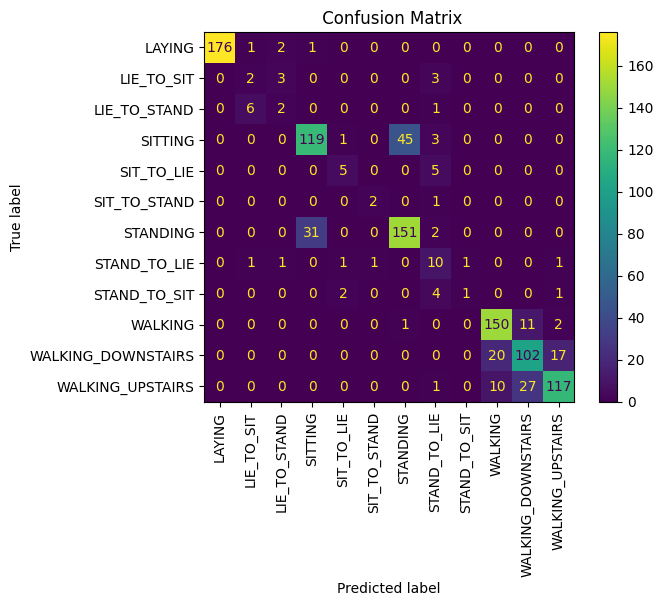

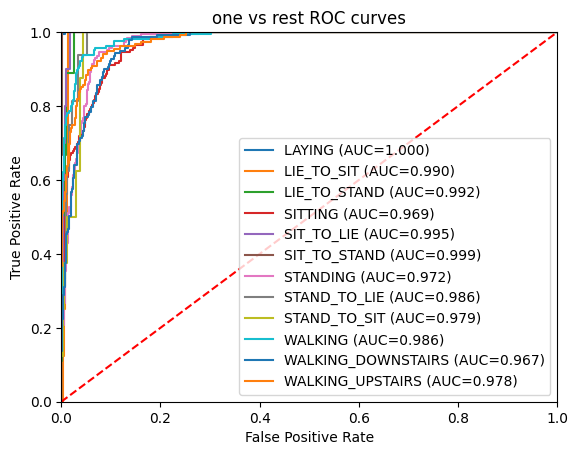

In [26]:
report_utils.classification_summary(y_valid, svm.predict_proba(x_valid))